In [ ]:
!apt-get install poppler-utils
!pip install pdf2image
!pip install easyocr

In [ ]:
from pdf2image import convert_from_path
import easyocr
import numpy as np
import PIL
from PIL import ImageDraw
import spacy
from IPython.display import display, Image
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize 

In [ ]:
reader = easyocr.Reader(['en'])
ps = PorterStemmer()

In [ ]:
def importAndConvert(fileName):
  #input: single page
  #output: bounds
  obj = convert_from_path(fileName)
  pageCount = len(obj)
  return obj,pageCount

In [ ]:
def createBounds(obj):
  bounds = reader.readtext(np.array(obj),min_size=0,slope_ths=0.2,ycenter_ths=0.2,height_ths=0.6,width_ths=0.8,decoder='beamsearch',beamWidth=10)
  return bounds

In [ ]:
def bound2text(bounds):
  text=''
  for i in range(len(bounds)):
    text = text+bounds[i][1]+' '
  return text

In [ ]:
def stem(textArray):
  stemArray = []
  for word in textArray:
    stemArray.append(ps.stem(word))
  return stemArray

In [ ]:
def extract_education(text):
  #input=array of stem words
  #output=string of extracted education
  keywords=['SKILLS','EXPERIENCE','OBJECTIVES','PROJECTS','CERTIFICATIONS','TRAININGS']
  keywordsStems=stem(keywords)
  education=''
  for i in range(len(text)):
    if text[i]=="educ":
      for j in range(i,len(text)):
        if text[j] not in keywordsStems:
          education+=text[j]+" "
        else:
           return education
    else:
      continue

In [ ]:
def draw_boxes(image, bounds, color='yellow',width=2):
  draw = ImageDraw.Draw(image)
  for bound in bounds:
    p0,p1,p2,p3 = bound[0]
    draw.line([*p0,*p1,*p2,*p3,*p0],fill=color,width=width)
  display(image)

In [ ]:
def processBatchBounds(imageObj,pageCount):
  pureText = ""
  for i in range(pageCount):
    bounds = createBounds(imageObj[i])
    pureText+=bound2text(bounds)
    draw_boxes(imageObj[i], bounds)
  return pureText

<h1>Start Job</h1>

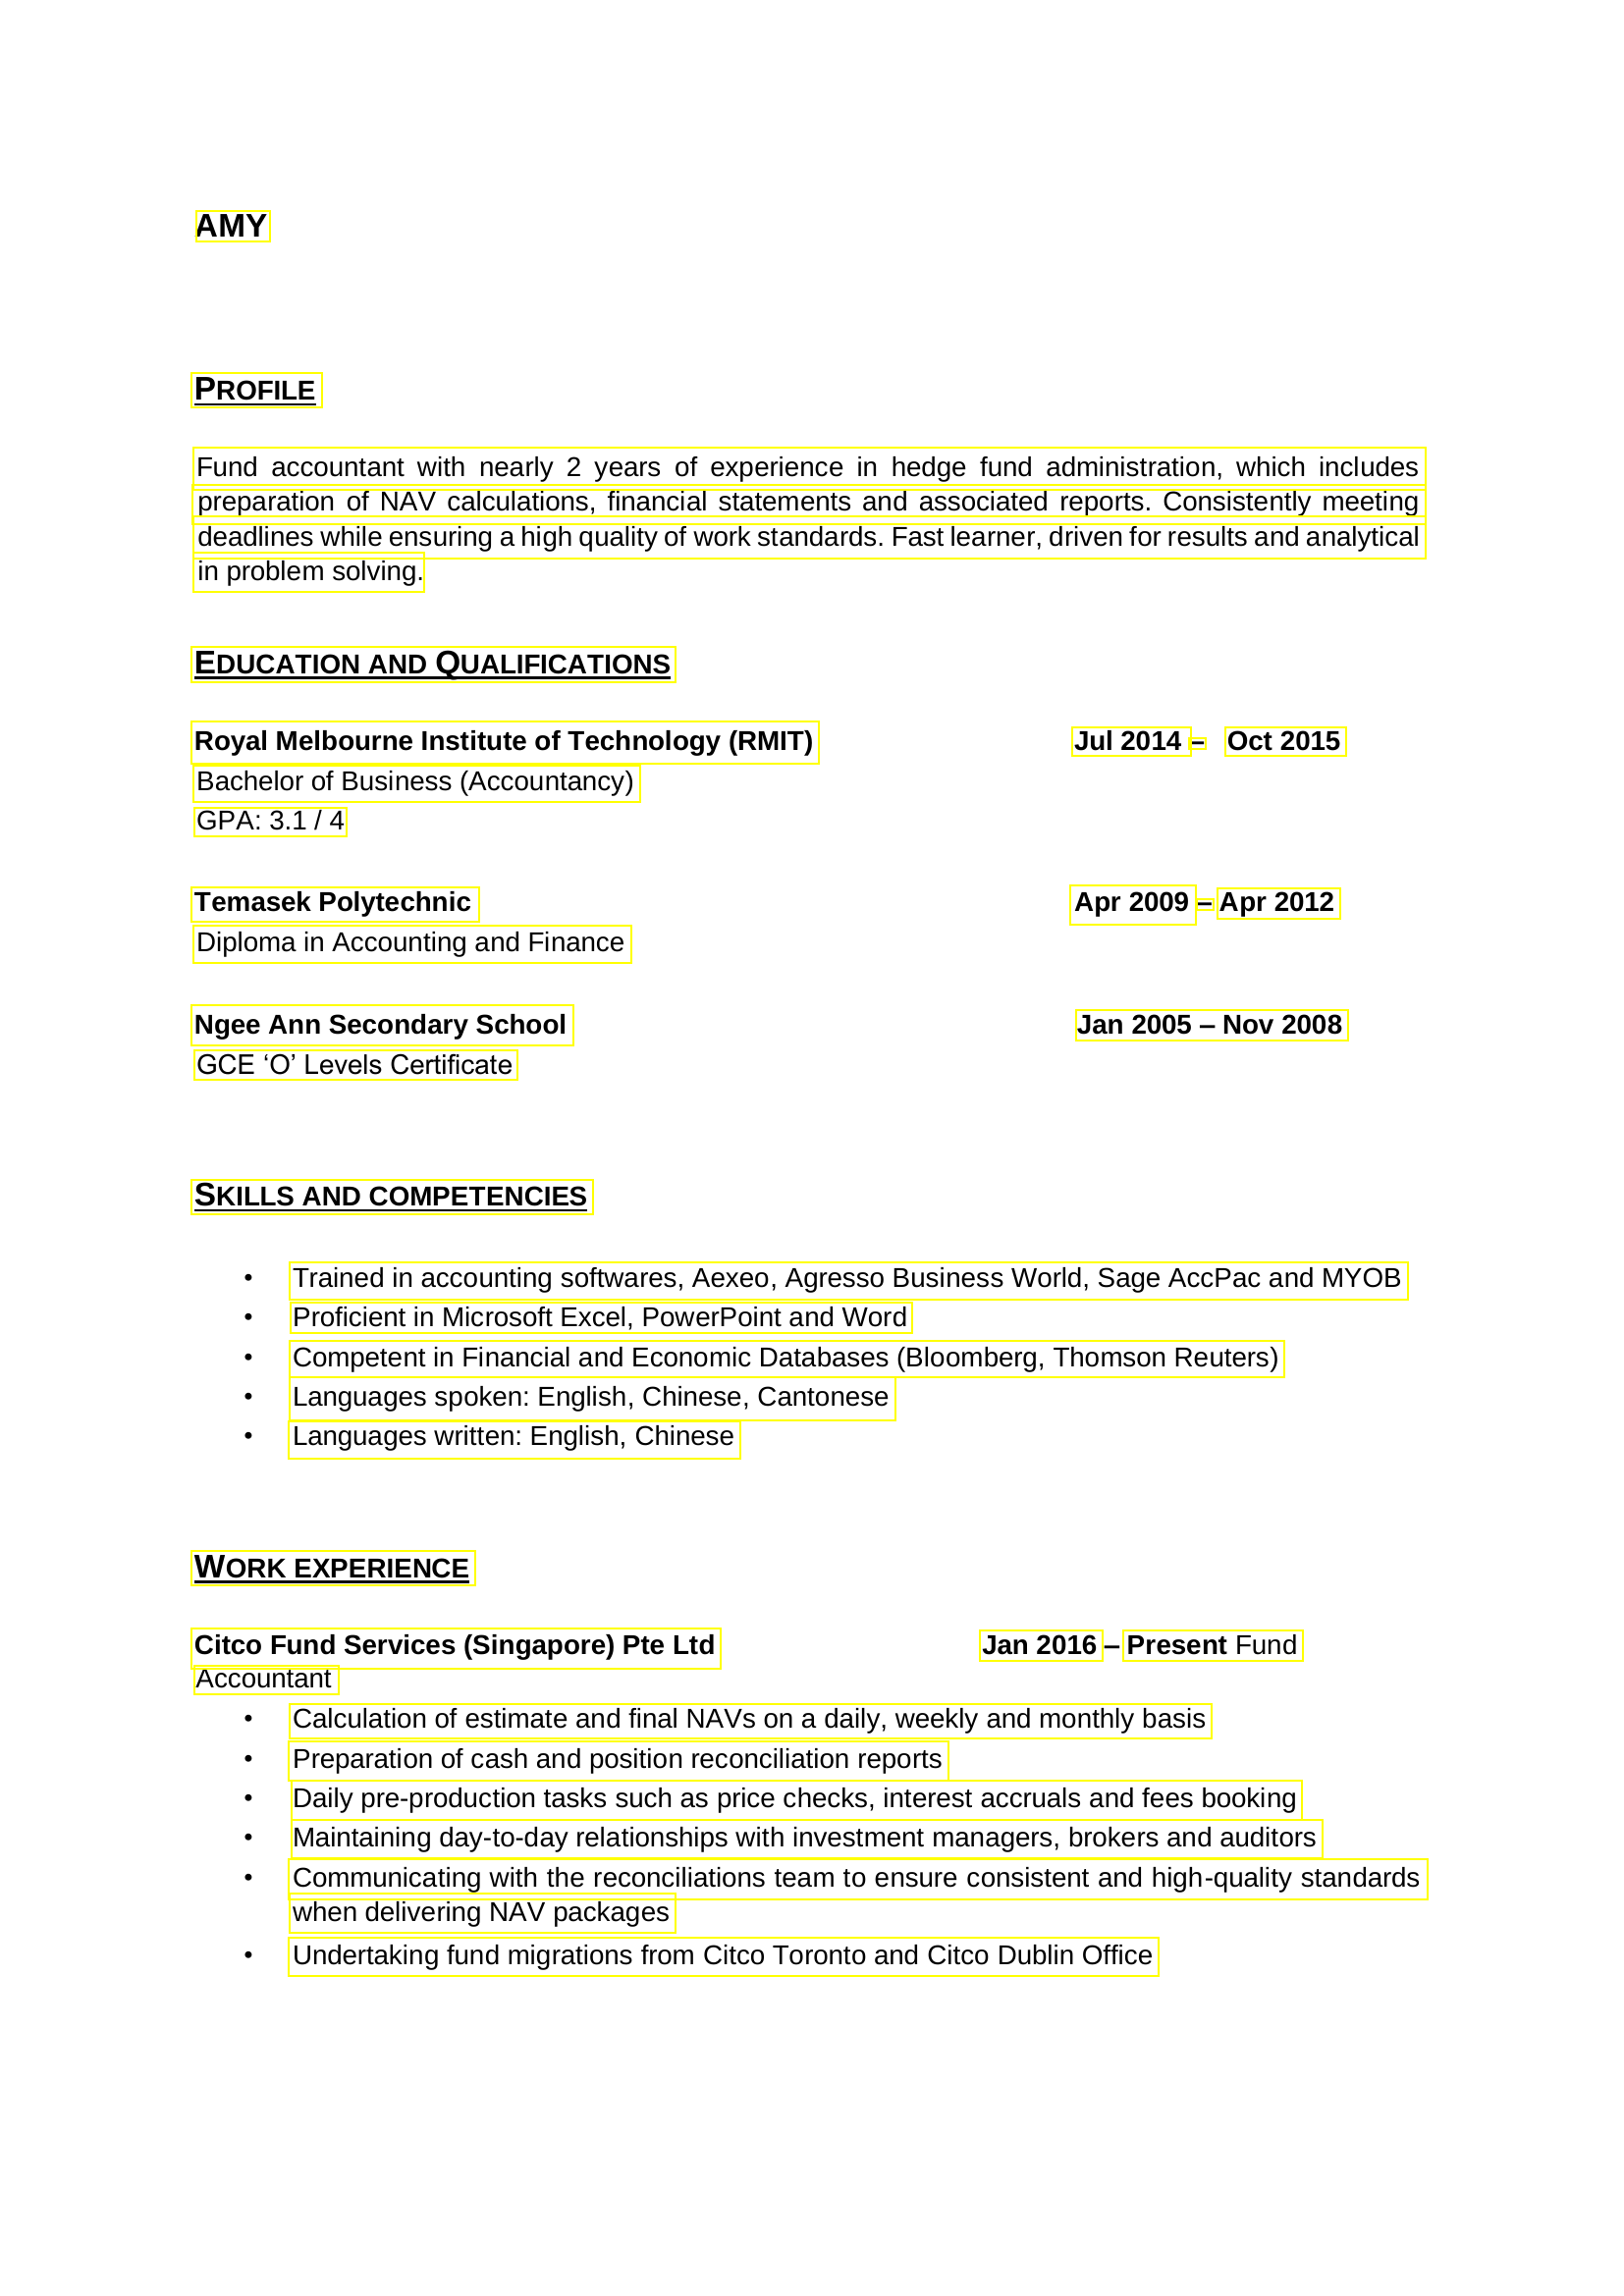

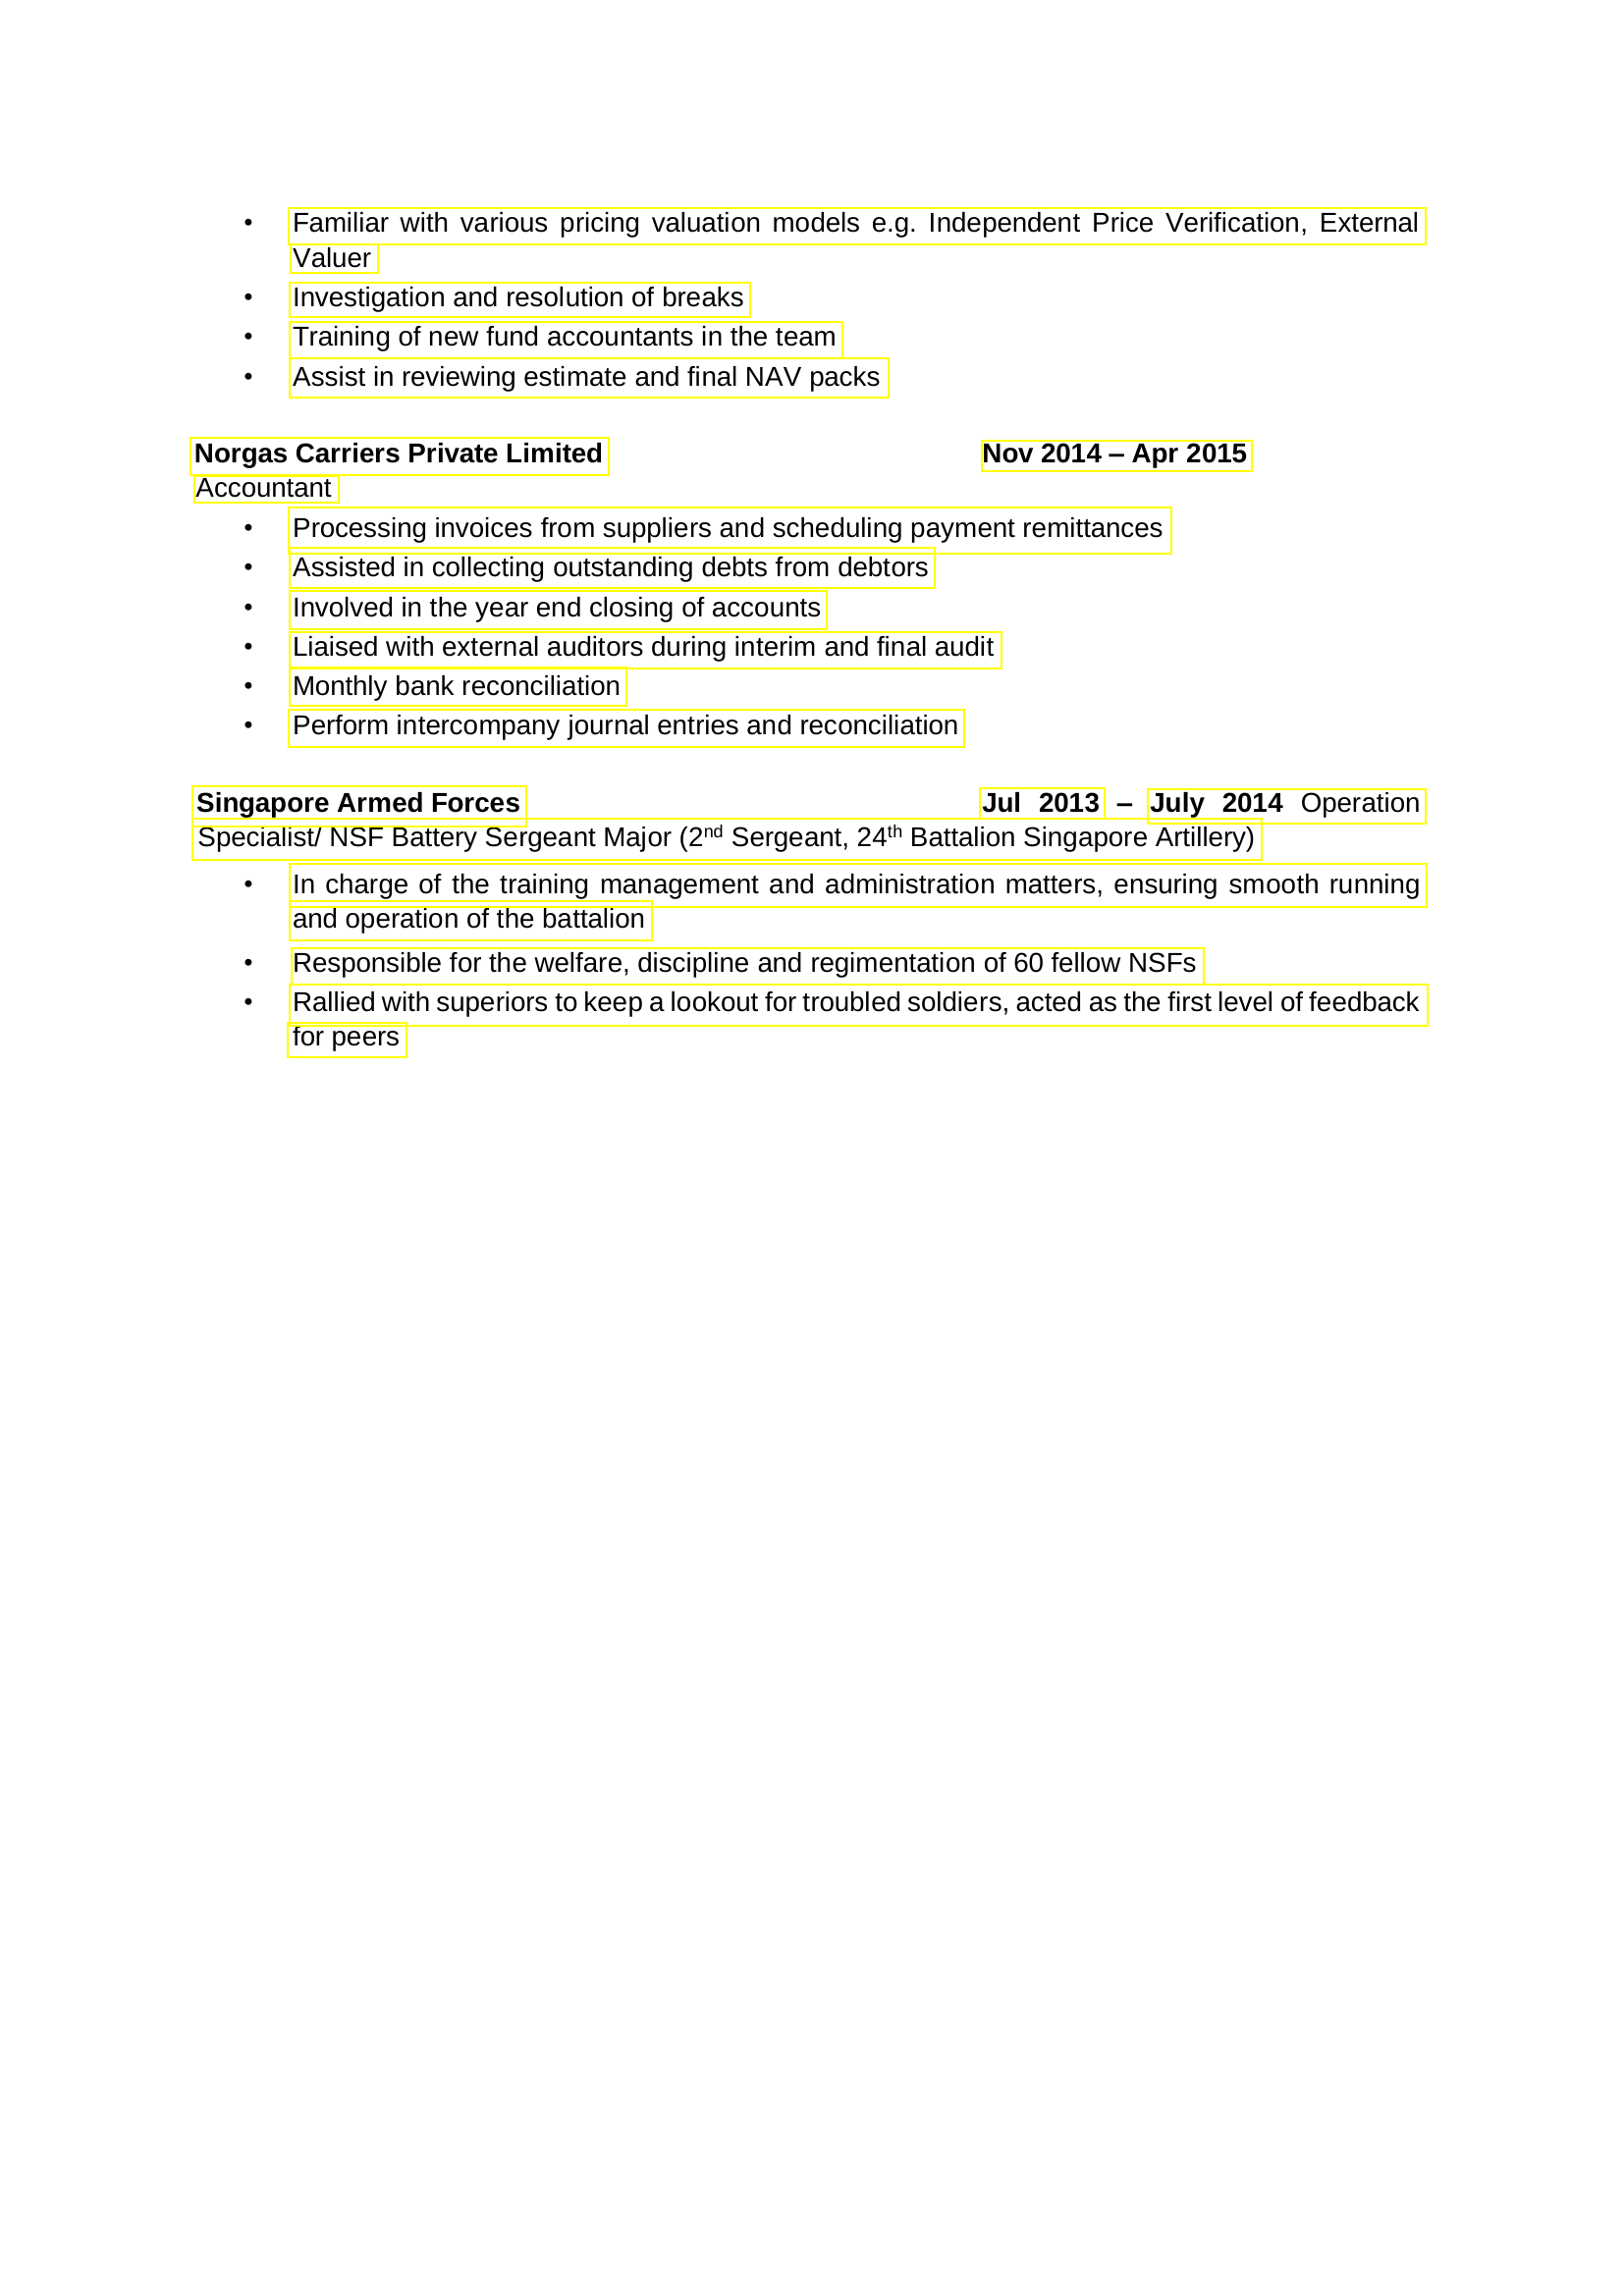

educ and qualif royal melbourn institut of technolog (rmit) jul 2014 T oct 2015 bachelor of busi (accountancy) gpa: 3.1/4 temasek polytechn apr 2009 T apr 2012 diploma in account and financ ngee ann secondari school jan 2005 _ nov 2008 gce '0' level 


In [ ]:
imageObj,pageCount = importAndConvert("/content/drive/My Drive/demo.pdf")
pureText = processBatchBounds(imageObj,pageCount)
stemArray = stem(pureText.split(" "))
res = extract_education(stemArray)
print(res)

***Performance insights***


---


2 mins 4 seconds for 2 page OCR for CPU </br>
1 min for 2 page OCR for GPU
